In [1]:
!pip install tensorflow

In [5]:
# Download using requests libraryimport requests
!pip install requests
import requests

url = "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

f.name

'train-labels-idx1-ubyte.gz'

In [7]:
 # Unzip using gzip library

import gzip
with gzip.open(filename, 'rb') as f:
    file_content = f.read(16) # read first 16 lines
    print(file_content)

b'\x00\x00\x08\x01\x00\x00\xea`\x05\x00\x04\x01\t\x02\x01\x03'


In [8]:
# Download using shell commands

!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0   462k      0 --:--:-- --:--:-- --:--:--  462k


In [9]:
# Unzip using shell command

!gunzip -c train-labels-idx1-ubyte.gz > train-labels.dat

In [10]:
#Acquire data
#Download files. (There are 4 separate files)

!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz # training set images
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz # training set labels
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz # test set images
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz # test set labels

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  97.4M      0 --:--:-- --:--:-- --:--:-- 97.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0  1226k      0 --:--:-- --:--:-- --:--:-- 1226k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  35.7M      0 --:--:-- --:--:-- --:--:-- 35.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0   170k      0 --:--:-- --:--:-- --:--:--  170k


In [11]:
# Extract files and rename them.

!gunzip -c train-images-idx3-ubyte.gz > train-images.dat
!gunzip -c train-labels-idx1-ubyte.gz > train-labels.dat
!gunzip -c t10k-images-idx3-ubyte.gz > test-images.dat
!gunzip -c t10k-labels-idx1-ubyte.gz > test-labels.dat

In [12]:
# Read binary data into separate lists. Repeat for each dataset.

def load_binary_data(filename):
    data = []
    with open(filename, 'rb') as f:
        file_content = f.read()
        for line in file_content:
            data.append(line)
        return data

train_images = load_binary_data('train-images.dat')
train_labels = load_binary_data('train-labels.dat')
test_images = load_binary_data('test-images.dat')
test_labels = load_binary_data('test-labels.dat')

In [13]:
# Let’s take a look at what the data looks like:

train_images[:20]


[0, 0, 8, 3, 0, 0, 234, 96, 0, 0, 0, 28, 0, 0, 0, 28, 0, 0, 0, 0]

In [14]:
train_labels[:20]

[0, 0, 8, 1, 0, 0, 234, 96, 5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5]

In [15]:
print('Checking the size of overhead in images:')
print('Training: ', len(train_images) - 784*60000)
print('Test: ', len(test_images) - 784*10000)
print('')
print('Checking the size of overhead in labels')
print('Training: ', len(train_labels) - 60000)
print('Test: ', len(test_labels) - 10000)

Checking the size of overhead in images:
Training:  16
Test:  16

Checking the size of overhead in labels
Training:  8
Test:  8


In [16]:
#  Prepare data
#Discard leading data (16 from images, 8 from labels)

train_images = train_images[16:]
test_images = test_images[16:]
train_labels = train_labels[8:]
test_labels = test_labels[8:]

In [17]:
import numpy as np

train_images = np.array(train_images).reshape((-1,28,28)) # -1 means no constraint on the size of depth as long as the row and column sizes are 28
test_images = np.array(test_images).reshape((-1,28,28))
print('Training set shape: ', train_images.shape)
print('Test set shape: ', test_images.shape)

Training set shape:  (60000, 28, 28)
Test set shape:  (10000, 28, 28)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


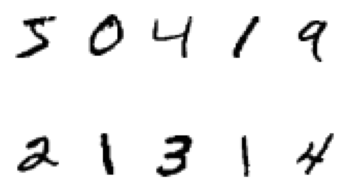

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.axis('off')
    plt.imshow(train_images[i-1], cmap=plt.cm.gray_r, interpolation=None)
plt.show()

In [19]:
print(train_labels[:10])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# We are going to use a small portion of the dataset for initial investigation
X = train_images[:6000]
y = train_labels[:6000]

# Reshape the images data set so that it has observations in the rows and features in the columns.
n_samples = len(X)
X = X.reshape((n_samples, -1))

# Split data into training and test sets
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras import models
from keras import layers

In [35]:
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [41]:
model = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=12)

Epoch 1/12
126/126 [==============================] - 4s 28ms/step - loss: 0.3123 - accuracy: 0.3900
Epoch 2/12
126/126 [==============================] - 3s 27ms/step - loss: 0.2452 - accuracy: 0.4495
Epoch 3/12
126/126 [==============================] - 3s 27ms/step - loss: 0.2365 - accuracy: 0.4841
Epoch 4/12
126/126 [==============================] - 3s 27ms/step - loss: 0.2270 - accuracy: 0.5085
Epoch 5/12
126/126 [==============================] - 3s 27ms/step - loss: 0.2173 - accuracy: 0.5371
Epoch 6/12
126/126 [==============================] - 3s 27ms/step - loss: 0.2081 - accuracy: 0.5602
Epoch 7/12
126/126 [==============================] - 3s 27ms/step - loss: 0.1992 - accuracy: 0.5935
Epoch 8/12
126/126 [==============================] - 3s 28ms/step - loss: 0.1910 - accuracy: 0.6326
Epoch 9/12
126/126 [==============================] - 3s 27ms/step - loss: 0.1810 - accuracy: 0.6667
Epoch 10/12
126/126 [==============================] - 3s 27ms/step - loss: 0.1712 - accura

In [46]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.146968811750412
accuracy= 0.7540404200553894


In [47]:
y_predicted_by_model = model.predict(x_test)

In [48]:
y_predicted_by_model[0]

array([3.5221127e-03, 9.9219491e-05, 5.3884175e-02, 8.6306990e-04,
       3.5613745e-01, 8.9682512e-02, 2.4861537e-01, 1.3834045e-02,
       1.5913989e-01, 7.4222177e-02], dtype=float32)

In [51]:
np.argmax(y_predicted_by_model[0])

4